In [ ]:
#author Rong Li & Joanna

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
drive.mount('/content/drive')
os.listdir()
os.chdir('./drive/MyDrive/spotify')
# os.chdir('/content/drive/MyDrive/summer projects')

Mounted at /content/drive


In [ ]:
!pwd

/content/drive/MyDrive/summer projects


In [ ]:
data = pd.read_csv('cleaneduserdata.csv')
# data

In [ ]:
data

,username,playlist_uri,track_uri,track_name,artist_uri,artist_name,album,track_pop,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,ricoo97,3H3fj0NBWGmKX34QbvpSTH,spotify:track:1VA38sp5Jr6vWxgoIcnxKN,0,spotify:artist:0cQbJU1aAzvbEmTuljWLlF,No Doubt,Tragic Kingdom,10,0.07990,0.641,0.914,0.000065,2.0,0.1320,-4.798,1.0,0.0500,107.996,0.723
1,ricoo97,5d1b9s9AbZMx8jbSfRjnmk,spotify:track:340UVheS8z3ncW9TTUhAbc,1,spotify:artist:26VFTg2z8YR0cCuwLzESi2,Halsey,Nightmare,69,0.01880,0.611,0.622,0.000000,9.0,0.3590,-5.075,0.0,0.0734,146.110,0.538
2,ricoo97,5d1b9s9AbZMx8jbSfRjnmk,spotify:track:4svZDCRz4cJoneBpjpx8DJ,2,spotify:artist:06HL4z0CvFAxyc27GXpf02,Taylor Swift,reputation,75,0.06790,0.696,0.602,0.000021,0.0,0.0696,-6.156,0.0,0.1590,82.989,0.305
3,ricoo97,5d1b9s9AbZMx8jbSfRjnmk,spotify:track:5qmq61DAAOUaW8AUo8xKhh,3,spotify:artist:56oDRnqbIiwx4mymNEv7dS,Lizzo,Cuz I Love You (Deluxe),64,0.11000,0.715,0.624,0.000000,4.0,0.1230,-3.046,0.0,0.1140,158.087,0.412
4,ricoo97,5d1b9s9AbZMx8jbSfRjnmk,spotify:track:4Pm6d1HchNq8x2Q67OkP8L,4,spotify:artist:74XFHRwlV6OrjEM0A2NCMF,Paramore,Brand New Eyes,50,0.00105,0.583,0.960,0.000030,1.0,0.0801,-3.597,0.0,0.0511,137.991,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102526,kylimichelleburris82,5dzlz2brPw4pUChmMBxiIz,spotify:track:6TodWdTSDfzwgYynTZSvJn,10331,spotify:artist:1AhjOkOLkbHUfcHDSErXQs,88rising,Head In The Clouds,73,0.35900,0.409,0.678,0.000005,9.0,0.1670,-7.731,1.0,0.0878,89.968,0.168
102527,kylimichelleburris82,5dzlz2brPw4pUChmMBxiIz,spotify:track:6vBdBCoOhKHiYDDOcorfNo,10340,spotify:artist:246dkjvS1zLTtiykXe5h60,Post Malone,Goodbyes (Feat. Young Thug),1,0.44700,0.580,0.653,0.000000,5.0,0.1110,-3.818,1.0,0.0745,150.231,0.175
102528,kylimichelleburris82,5dzlz2brPw4pUChmMBxiIz,spotify:track:6fTt0CH2t0mdeB2N9XFG5r,10295,spotify:artist:7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,7 EP,64,0.34200,0.703,0.594,0.000000,5.0,0.1230,-6.146,0.0,0.0752,153.848,0.475
102529,kylimichelleburris82,5dzlz2brPw4pUChmMBxiIz,spotify:track:5ry2OE6R2zPQFDO85XkgRb,1569,spotify:artist:3TVXtAsR1Inumwj472S9r4,Drake,The Best In The World Pack,78,0.10100,0.831,0.502,0.000000,10.0,0.1220,-4.045,0.0,0.0460,100.541,0.101


In [ ]:
data = data.drop(data.columns[0:2], axis = 1)
data = data.drop(['duration_ms', 'time_signature'], axis = 1)
# dct = dict.fromkeys(data.track_name)
song = {}
for i, song_name in enumerate(data['track_name'].unique()):
  song[song_name] = i
data['track_name'] = data['track_name'].apply(lambda x: song[x])

In [ ]:
X_train, X_test = train_test_split(data, stratify = data['username'], random_state = 2, test_size = 0.2)

# generate user vectors

In [ ]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_train_transformed = norm.fit_transform(X_train.iloc[:, 7:19])  # fit does nothing.

In [ ]:
col_lists = data.columns[7:19]
X_train_transformed = pd.DataFrame(X_train_transformed,columns = col_lists)
X_train_transformed.head()

,track_pop,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,-1.268796,-0.558046,-0.266579,-0.172074,-0.352063,1.326350,0.870616,0.095512,-1.295303,1.509363,1.210330,0.302426
1,0.498172,-0.513839,0.335976,0.417690,-0.442049,0.768336,-0.449211,0.867092,0.772020,-0.225970,-0.767031,-0.896948
2,1.616050,-0.185444,-1.554393,0.031586,-0.442049,0.489330,0.102462,0.357055,-1.295303,-0.305398,2.101680,-0.999283
3,1.435747,-0.917126,1.771474,0.069772,-0.441858,-1.184710,-0.583289,0.338825,-1.295303,0.050302,1.057996,-0.225626
4,0.534232,-0.866231,0.253272,0.540735,-0.442043,-0.905704,-0.606334,0.070375,0.772020,-0.501379,-1.220982,0.662647


In [ ]:
X_train_transformed.index = X_train['username']
X_train_transformed['track_name'] = X_train['track_name'].to_list()
X_train_transformed.head()

,track_pop,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,track_name
username,,,,,,,,,,,,,
infiniteembers,-1.268796,-0.558046,-0.266579,-0.172074,-0.352063,1.326350,0.870616,0.095512,-1.295303,1.509363,1.210330,0.302426,22233
22z7gq2sv2eblgvg6znceoj7q,0.498172,-0.513839,0.335976,0.417690,-0.442049,0.768336,-0.449211,0.867092,0.772020,-0.225970,-0.767031,-0.896948,10529
32640okyy4uys55uzphqy10cl,1.616050,-0.185444,-1.554393,0.031586,-0.442049,0.489330,0.102462,0.357055,-1.295303,-0.305398,2.101680,-0.999283,4390
jayden155044,1.435747,-0.917126,1.771474,0.069772,-0.441858,-1.184710,-0.583289,0.338825,-1.295303,0.050302,1.057996,-0.225626,555
jayden155044,0.534232,-0.866231,0.253272,0.540735,-0.442043,-0.905704,-0.606334,0.070375,0.772020,-0.501379,-1.220982,0.662647,9003


In [ ]:
user = X_train_transformed.groupby(by = ["username"])[col_lists].mean()
user.head()

,track_pop,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
username,,,,,,,,,,,,
0dztok9i1a5lh4wltzg072h9b,0.422338,0.903278,-0.549961,-0.692224,-0.434138,-0.138435,0.166718,-0.514823,0.346395,-0.087238,0.032201,-0.014478
11121287154,-0.148465,-0.184357,0.196086,0.185860,-0.325968,0.010104,-0.022639,0.340028,-0.116177,0.061030,0.116798,0.070712
11133670925,0.300258,-0.018338,0.299203,-0.033448,-0.424942,0.021074,-0.119736,0.334900,-0.069332,-0.078602,-0.010219,0.149904
1126833569,0.291855,-0.276673,0.386422,0.397100,-0.251637,0.017228,0.007286,0.258206,-0.040359,-0.112094,-0.005800,0.674956
1188142915,-0.307560,-0.155406,0.396740,-0.063329,-0.411986,0.120982,-0.100139,0.239334,-0.210094,0.326286,-0.173078,0.162084


In [ ]:
whole_rating = []
for u in user.index.to_list():
  track_lst = X_train_transformed.loc[u,:]
  user_vector = np.array(user.loc[u])
  user_music_rating = [0]*(max(X_train.track_name.unique())+1)

  for i in range(len(track_lst)):
    vector = np.array(track_lst.iloc[i][:-1])
    loc = track_lst.iloc[i][-1]
    dist = sum((vector-user_vector)**2)
    user_music_rating[int(loc)] = 1/dist

  whole_rating.append(user_music_rating)

In [ ]:
rating = pd.DataFrame(whole_rating)

In [ ]:
rating.index = user.index.to_list()

In [ ]:
rating

,0,1,2,3,4,5,6,7,8,9,...,49557,49558,49559,49560,49561,49562,49563,49564,49565,49566
0dztok9i1a5lh4wltzg072h9b,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
11121287154,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
11133670925,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1126833569,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1188142915,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t91tig8ypgw36roaydp1tweup,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
te8jjowlgkfrbtxe0cw1xv3wm,0.0,0.0,0.0,0.182603,0.0,0.0,0.0,0.054626,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
tiny.paws,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
unicorn.mario,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rating.to_csv('rating.csv')

In [ ]:
#if we already have rating.csv
rating = pd.read_csv('rating.csv')

In [ ]:
rating.head()

,0,1,2,3,4,5,6,7,8,9,...,49557,49558,49559,49560,49561,49562,49563,49564,49565,49566
0dztok9i1a5lh4wltzg072h9b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
11121287154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
11133670925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1126833569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
1188142915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0


# model training

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
import tensorflow.compat.v1 as tf


tf.disable_v2_behavior()

ratings = tf.convert_to_tensor(
    rating.values, dtype=None, dtype_hint=None, name=None
)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:


def sparse_mean_square_error(sparse_ratings, user_embeddings, movie_embeddings):
  """
  Args:
    sparse_ratings: A SparseTensor rating matrix, of dense_shape [N, M]
    user_embeddings: A dense Tensor U of shape [N, k] where k is the embedding
      dimension, such that U_i is the embedding of user i.
    movie_embeddings: A dense Tensor V of shape [M, k] where k is the embedding
      dimension, such that V_j is the embedding of movie j.
  Returns:
    A scalar Tensor representing the MSE between the true ratings and the
      model's predictions.
  """
  predictions = tf.matmul(user_embeddings, movie_embeddings, transpose_b=True)
  loss = tf.losses.mean_squared_error(sparse_ratings, predictions)
  return loss

In [ ]:
class CFModel(object):
  """Simple class that represents a collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Initializes a CFModel.
    Args:
      embedding_vars: A dictionary of tf.Variables.
      loss: A float Tensor. The loss to optimize.
      metrics: optional list of dictionaries of Tensors. The metrics in each
        dictionary will be plotted in a separate figure during training.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """The embeddings dictionary."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Trains the model.
    Args:
      iterations: number of iterations to run.
      learning_rate: optimizer learning rate.
      plot_results: whether to plot the results at the end of training.
      optimizer: the optimizer to use. Default to GradientDescentOptimizer.
    Returns:
      The metrics dictionary evaluated at the last iteration.
    """
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()

    with self._session.as_default():
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Train and append results.
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)
          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()
        
      if plot_results:
        # Plot the metrics.
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

def build_model(A_train, embedding_dim=3, init_stddev=1.):
  """
  Args:
    ratings: a DataFrame of the ratings
    embedding_dim: the dimension of the embedding vectors.
    init_stddev: float, the standard deviation of the random initial embeddings.
  Returns:
    model: a CFModel.
  """
  # Split the ratings DataFrame into train and test.
  # train_ratings, test_ratings = split_dataframe(ratings)
  # SparseTensor representation of the train and test datasets.
  # A_train = build_rating_sparse_tensor(train_ratings)
  # A_test = build_rating_sparse_tensor(test_ratings)
  # Initialize the embeddings using a normal distribution.
  U = tf.Variable(tf.random_normal(
      [A_train.shape[0], embedding_dim], stddev=init_stddev))
  V = tf.Variable(tf.random_normal(
      [A_train.shape[1], embedding_dim], stddev=init_stddev))
  train_loss = sparse_mean_square_error(A_train, U, V)
  # test_loss = sparse_mean_square_error(A_test, U, V)
  metrics = {
      'train_error': train_loss
      # 'test_error': test_loss
  }
  embeddings = {
      "user_id": U,
      "movie_id": V
  }
  return CFModel(embeddings, train_loss, [metrics])

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


 iteration 1000: train_error=2.216339

[{'train_error': 2.2163386}]

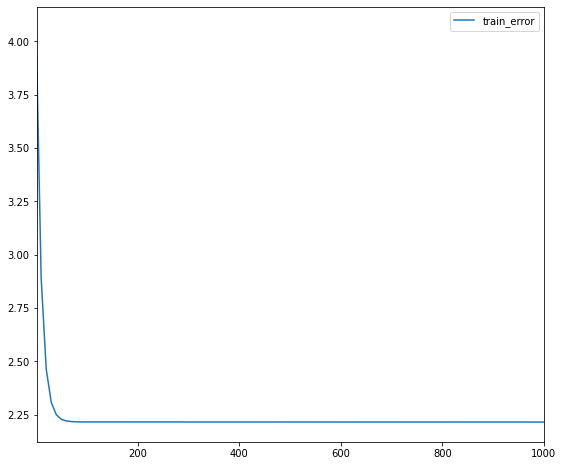

In [ ]:
model = build_model(ratings, embedding_dim=30, init_stddev=0.5)
model.train(num_iterations=1000, learning_rate=10.)

In [ ]:
model.embeddings["user_id"].shape

(102, 30)

In [ ]:
model.embeddings["movie_id"].T.shape

(30, 49567)

In [ ]:
embedding_user = model.embeddings["user_id"]
embedding_song = model.embeddings["movie_id"].T

In [ ]:
rst = embedding_user @ embedding_song
rst

array([[-0.00670971, -0.00180907, -0.00730717, ...,  0.00645058,
        -0.00675644, -0.00402178],
       [-0.01872274, -0.04425199, -0.02721483, ...,  0.02528337,
         0.02458201, -0.01763268],
       [-0.0396013 ,  0.01310896,  0.02618119, ...,  0.00739711,
         0.05861642, -0.02258532],
       ...,
       [ 0.01981751,  0.02414371,  0.01484577, ..., -0.06394599,
         0.01135028,  0.03105111],
       [-0.03924932, -0.05786946, -0.01792736, ...,  0.0382444 ,
        -0.03193573, -0.02472637],
       [-0.00353282, -0.00564389, -0.00253111, ..., -0.00132063,
        -0.00072065,  0.00662981]], dtype=float32)

In [ ]:
rst = (rating.to_numpy()*(-1000))+ rst

array([[-0.00670971, -0.00180907, -0.00730717, ...,  0.00645058,
        -0.00675644, -0.00402178],
       [-0.01872274, -0.04425199, -0.02721483, ...,  0.02528337,
         0.02458201, -0.01763268],
       [-0.0396013 ,  0.01310896,  0.02618119, ...,  0.00739711,
         0.05861642, -0.02258532],
       ...,
       [ 0.01981751,  0.02414371,  0.01484577, ..., -0.06394599,
         0.01135028,  0.03105111],
       [-0.03924932, -0.05786946, -0.01792736, ...,  0.0382444 ,
        -0.03193573, -0.02472637],
       [-0.00353282, -0.00564389, -0.00253111, ..., -0.00132063,
        -0.00072065,  0.00662981]])

In [ ]:
recommend_song_idx = []
for row in rst:
  recommend_song_idx.append(sorted(range(len(row)), key=lambda i: row[i], reverse=True)[:5])

In [ ]:
recommend_song_idx

[[46283, 29248, 21849, 32875, 36480],
 [4788, 18294, 7724, 1097, 27094],
 [19548, 43571, 47047, 40033, 46737],
 [2720, 31607, 37260, 48754, 3178],
 [29945, 33363, 13942, 2343, 24413],
 [8577, 42179, 46718, 33430, 10590],
 [26798, 16186, 8315, 42453, 17535],
 [11219, 34325, 32238, 24438, 49433],
 [17937, 48086, 10161, 13629, 15632],
 [34402, 11479, 48466, 23830, 21958],
 [12357, 33949, 20183, 25796, 33032],
 [42136, 1988, 819, 21003, 45679],
 [17094, 24553, 38968, 27442, 10141],
 [48085, 25242, 46229, 17779, 35626],
 [15408, 17208, 34534, 12663, 41511],
 [26087, 36622, 38415, 21620, 1627],
 [3480, 10702, 5316, 36364, 23666],
 [42180, 9073, 4744, 31887, 41607],
 [4894, 32022, 22328, 9728, 19403],
 [23702, 16069, 14717, 23204, 1687],
 [16387, 15186, 15098, 39991, 45374],
 [19548, 26688, 16940, 30960, 31375],
 [47112, 36057, 42881, 33750, 7709],
 [26276, 3129, 39719, 16106, 35237],
 [30564, 33620, 4946, 37006, 43663],
 [33552, 41882, 17893, 27717, 46177],
 [31713, 48412, 28513, 39888, 3417

In [ ]:
DOT = 'dot'
COSINE = 'cosine'
def compute_scores(query_embedding, item_embeddings, measure=DOT):
  """Computes the scores of the candidates given a query.
  Args:
    query_embedding: a vector of shape [k], representing the query embedding.
    item_embeddings: a matrix of shape [N, k], such that row i is the embedding
      of item i.
    measure: a string specifying the similarity measure to be used. Can be
      either DOT or COSINE.
  Returns:
    scores: a vector of shape [N], such that scores[i] is the score of item i.
  """
  u = query_embedding
  V = item_embeddings
  if measure == COSINE:
    V = V / np.linalg.norm(V, axis=1, keepdims=True)
    u = u / np.linalg.norm(u)
  scores = u.dot(V.T)
  return scores

def user_recommendations(model, measure=DOT, exclude_rated=False, k=6):
  if USER_RATINGS:
    scores = compute_scores(
        model.embeddings["user_id"][943], model.embeddings["movie_id"], measure)
    score_key = measure + ' score'
    df = pd.DataFrame({
        score_key: list(scores),
        'movie_id': movies['movie_id'],
        'titles': movies['title'],
        'genres': movies['all_genres'],
    })
    if exclude_rated:
      # remove movies that are already rated
      rated_movies = ratings[ratings.user_id == "943"]["movie_id"].values
      df = df[df.movie_id.apply(lambda movie_id: movie_id not in rated_movies)]
    display.display(df.sort_values([score_key], ascending=False).head(k))  


def movie_neighbors(data, model, song_id, measure=DOT, k=6):
  # Search for movie ids that match the given substring.
  ids =  data[data['track_name'] == song_id].index.values
  titles = data.loc[ids]['track_name'].values
  if len(titles) == 0:
    raise ValueError("Found no movies with title %s" % song_id)
  print("Nearest neighbors of : %s." % titles[0])
  user_id = ids[0]
  scores = compute_scores(
        model.embeddings["movie_id"][2], model.embeddings["movie_id"],
        measure)
  score_key = measure + ' score'
  df = pd.DataFrame({
        score_key: list(scores)
  })
  df['song_name'] = list(song.keys())
  display.display(df.sort_values([score_key], ascending=False).head(k))


In [ ]:
movie_neighbors(X_train_transformed, model, 2)

Nearest neighbors of : 19557.


,dot score,song_name
2,7.715471,I Did Something Bad
6968,5.356974,GodLovesUgly - Remix
3108,5.330792,Kids
23793,5.268653,Zion Hears and Is Glad
39475,5.263288,dance with you
40944,5.215640,Can't Do Without (My Baby) - David Penn Remix


In [ ]:
movie_neighbors(X_train_transformed, model, 2, COSINE)

Nearest neighbors of : 19557.


,cosine score,song_name
2,1.000000,I Did Something Bad
17422,0.669729,If I Were a Bell
38399,0.640095,You Have More Friends Than You Know (Glee Cast...
40944,0.636426,Can't Do Without (My Baby) - David Penn Remix
24995,0.636164,"Don Giovanni, ossia Il dissoluto punito, K.527..."
40177,0.612882,Aria of the Soul
